# Exercice 3 : Classification

## Import librairies

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
print(os.getcwd())
current_path = os.getcwd()
path = os.path.abspath(os.path.join(current_path, '..'))
path

C:\Users\dutau\Downloads\projet_ML\projet_ML\notebooks\exo3


'C:\\Users\\dutau\\Downloads\\projet_ML\\projet_ML\\notebooks'

In [3]:
path1 = os.path.abspath(os.path.join(current_path, '..'))
path1

'C:\\Users\\dutau\\Downloads\\projet_ML\\projet_ML\\notebooks'

In [4]:
path_data = os.path.join(path, 'data')
os.chdir(path_data)
print(os.getcwd())

C:\Users\dutau\Downloads\projet_ML\projet_ML\notebooks\data


In [5]:
os.listdir()

['chiens.csv', 'simu.txt', 'voitures.csv', 'xsimutest.txt', '__pycache__']

## Load Dataset

In [6]:
df_voitures = pd.read_csv("voitures.csv")
df_voitures.head()

,Modele,CYL,PUIS,LON,LAR,POIDS,VITESSE,ACCEL,CO2
0,ALPHAMITO,875,105,406,172,1130,184,11.4,98
1,AUDIA1,999,95,397,174,1065,186,10.9,103
2,CITROENC4,1199,130,442,182,1280,196,10.1,115
3,JAGUARF,2995,340,447,192,1587,260,5.7,234
4,PEUGEOTRCZ,1997,160,428,184,1370,220,8.2,130


In [7]:
# Exemple de nettoyage des données : supprimer les lignes avec des valeurs manquantes
df_voitures = df_voitures.dropna()
df_voitures

,Modele,CYL,PUIS,LON,LAR,POIDS,VITESSE,ACCEL,CO2
0,ALPHAMITO,875,105,406,172,1130,184,11.4,98
1,AUDIA1,999,95,397,174,1065,186,10.9,103
2,CITROENC4,1199,130,442,182,1280,196,10.1,115
3,JAGUARF,2995,340,447,192,1587,260,5.7,234
4,PEUGEOTRCZ,1997,160,428,184,1370,220,8.2,130
5,LANDROVER,2993,256,483,191,2570,180,9.3,203
6,RENAULTCLIO,898,90,406,173,1092,182,12.2,105
7,BMWS3,1995,116,462,181,1570,198,11.1,109
8,DACIA,898,90,406,173,962,175,11.1,116
9,HYUNDAI,1995,136,447,185,1751,184,10.9,139


## Preprocessing

In [8]:
# Afficher les informations sur le DataFrame
df_voitures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Modele   20 non-null     object 
 1   CYL      20 non-null     int64  
 2   PUIS     20 non-null     int64  
 3   LON      20 non-null     int64  
 4   LAR      20 non-null     int64  
 5   POIDS    20 non-null     int64  
 6   VITESSE  20 non-null     int64  
 7   ACCEL    20 non-null     float64
 8   CO2      20 non-null     int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.5+ KB


In [9]:
cars = df_voitures.iloc[:, 0:8] 
cars

,Modele,CYL,PUIS,LON,LAR,POIDS,VITESSE,ACCEL
0,ALPHAMITO,875,105,406,172,1130,184,11.4
1,AUDIA1,999,95,397,174,1065,186,10.9
2,CITROENC4,1199,130,442,182,1280,196,10.1
3,JAGUARF,2995,340,447,192,1587,260,5.7
4,PEUGEOTRCZ,1997,160,428,184,1370,220,8.2
5,LANDROVER,2993,256,483,191,2570,180,9.3
6,RENAULTCLIO,898,90,406,173,1092,182,12.2
7,BMWS3,1995,116,462,181,1570,198,11.1
8,DACIA,898,90,406,173,962,175,11.1
9,HYUNDAI,1995,136,447,185,1751,184,10.9


# 1. Avec les données sur les voitures, réalisez une (ou des) classifications avec la méthode des kmean et interprétez les résultats obtenus

# Détermination du nombre optimal de clusters k

# Méthode du coude

C:\Users\dutau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dutau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dutau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dutau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

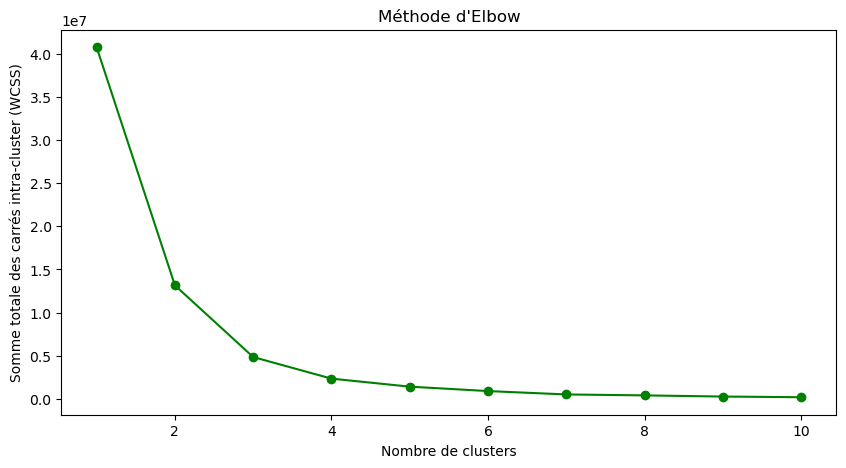

In [10]:
cars_numeric = cars.select_dtypes(include=[np.number])

# Application de K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cars_numeric)
    wcss.append(kmeans.inertia_)

# Tracé du graphique
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', color='green')
plt.title("Méthode d'Elbow")
plt.xlabel('Nombre de clusters')
plt.ylabel('Somme totale des carrés intra-cluster (WCSS)')
plt.show()

Dans ce graphique, il apparaît qu’il y a une cassure ou un « coude » à k = 3 et 4. Il n'est pas évident d'arbitrer objectivement entre ces deux nombres. Nous choisirons cependant 3 clusters dans notre cas.

# Application de l'algorithme de K-Means

On instancie notre estimateur:

In [11]:
print(cars.dtypes)

Modele      object
CYL          int64
PUIS         int64
LON          int64
LAR          int64
POIDS        int64
VITESSE      int64
ACCEL      float64
dtype: object


In [13]:
cars_numeric = cars.select_dtypes(include=[np.number])
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=42)
kmeans.fit(cars_numeric)

C:\Users\dutau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dutau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

On calcule les moyennes des variables en fonction des clusters 

In [14]:
kmeans.cluster_centers_

array([[2.32744444e+03, 1.84666667e+02, 4.64333333e+02, 1.87666667e+02,
        1.77888889e+03, 2.05888889e+02, 9.34444444e+00],
       [5.60650000e+03, 5.40500000e+02, 3.81500000e+02, 1.93500000e+02,
        1.80000000e+03, 2.92500000e+02, 4.45000000e+00],
       [1.12966667e+03, 9.87777778e+01, 4.11888889e+02, 1.74333333e+02,
        1.14711111e+03, 1.80666667e+02, 1.17777778e+01]])

Regardons maintenant les clusters que nous avons obtenus

In [15]:
pred = kmeans.predict(cars_numeric)
pred

array([2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0])

Ici 0,1 et 2 sont à considérer comme des variables catégorielles cardinales. Il n'y a pas d'ordre entre les clusters

In [16]:
df_voitures['cluster'] = pred
print('Nombre de données ou d observations dans chaque cluster :\n', 
      df_voitures['cluster'].value_counts().sort_index())
df_voitures

Nombre de données ou d observations dans chaque cluster :
 0    9
1    2
2    9
Name: cluster, dtype: int64


,Modele,CYL,PUIS,LON,LAR,POIDS,VITESSE,ACCEL,CO2,cluster
0,ALPHAMITO,875,105,406,172,1130,184,11.4,98,2
1,AUDIA1,999,95,397,174,1065,186,10.9,103,2
2,CITROENC4,1199,130,442,182,1280,196,10.1,115,2
3,JAGUARF,2995,340,447,192,1587,260,5.7,234,0
4,PEUGEOTRCZ,1997,160,428,184,1370,220,8.2,130,0
5,LANDROVER,2993,256,483,191,2570,180,9.3,203,0
6,RENAULTCLIO,898,90,406,173,1092,182,12.2,105,2
7,BMWS3,1995,116,462,181,1570,198,11.1,109,0
8,DACIA,898,90,406,173,962,175,11.1,116,2
9,HYUNDAI,1995,136,447,185,1751,184,10.9,139,0


On a donc 3 clusters de tailles 9, 2, 9


# Boxplots par cluster

cluster:  0


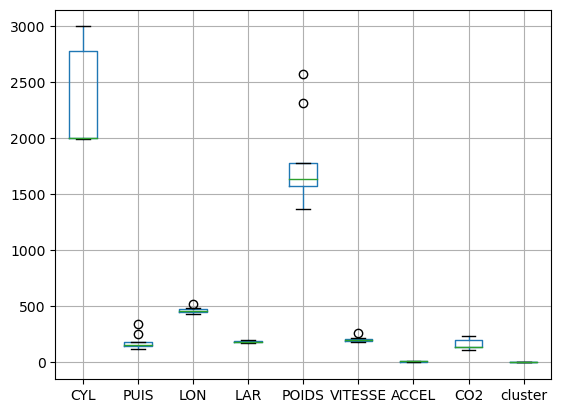

cluster:  1


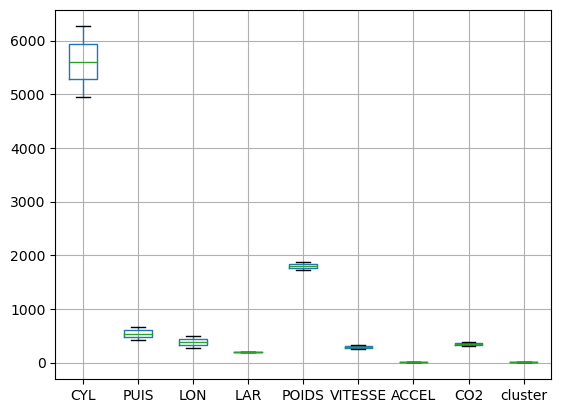

cluster:  2


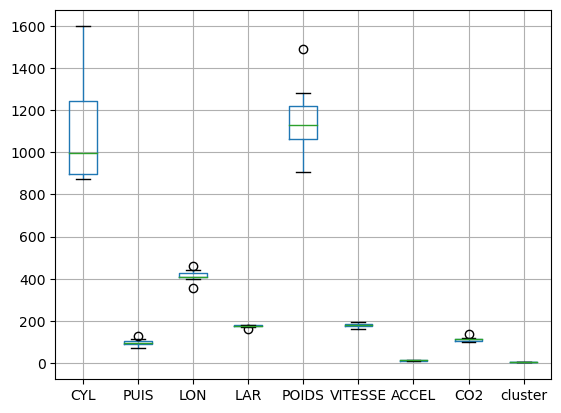

In [17]:
for i in [0,1,2]:
    print('cluster: ',i)
    df_voitures[df_voitures['cluster']==i].boxplot()
    plt.show()

# Cluster Means

In [18]:
cluster_means = df_voitures.groupby('cluster').mean()

cluster_means

C:\Users\dutau\AppData\Local\Temp\ipykernel_42748\1886233119.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df_voitures.groupby('cluster').mean()


,CYL,PUIS,LON,LAR,POIDS,VITESSE,ACCEL,CO2
cluster,,,,,,,,
0,2327.444444,184.666667,464.333333,187.666667,1778.888889,205.888889,9.344444,160.000000
1,5606.500000,540.500000,381.500000,193.500000,1800.000000,292.500000,4.450000,339.500000
2,1129.666667,98.777778,411.888889,174.333333,1147.111111,180.666667,11.777778,111.333333


# Clustering vectors

In [19]:
clustering_vector = df_voitures[['cluster']]
clustering_vector = clustering_vector.T #transposition
clustering_vector

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
cluster,2,2,2,0,0,0,2,0,2,0,0,2,1,2,0,1,0,2,2,0



# VISUALISATION DES CLUSTERS PREDITS PAR LE K-MEANS CLUSTERING

Nous devons d'abord choisir deux ou trois variables parmi les données pour 
visualiser les clusters. Étant donné que nous ne pouvons pas visualiser toutes 
les caractéristiques des voitures en même temps, nous choisirons deux ou trois
variables qui représentent le mieux la variation dans les données. 
Par exemple, nous pourrions choisir la vitesse et les émissions de CO2 
(CO2) pour une visualisation 2D

Justification de ce choix de variables : 
Cette paire de variables a été choisie pour capturer à la fois les aspects de performance et d'impact environnemental des véhicules. 
En effet, les émissions de CO2 sont souvent corrélées avec d'autres caractéristiques des voitures, comme la puissance ou le cylindrage


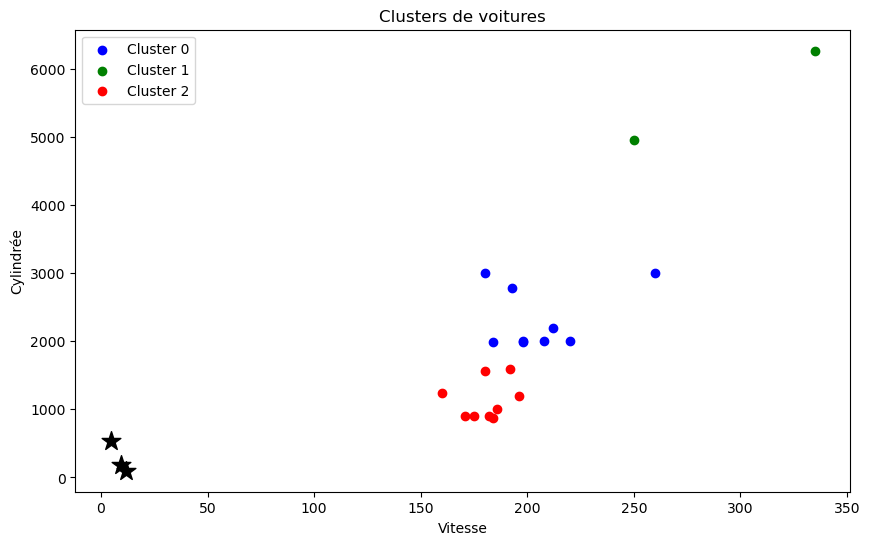

In [20]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']  # Couleurs pour les clusters (bleu pour le cluster 0, vert pour le cluster 1, rouge pour le cluster 2 et violet pour le cluster 3)

for i in range(3):
    # Données de chaque cluster
    cluster_table = df_voitures[df_voitures['cluster'] == i]
    plt.scatter(cluster_table['VITESSE'], cluster_table['CYL'], color=colors[i], 
                label=f'Cluster {i}')

    # pour les centres
    plt.scatter(centers[i][cars.columns.get_loc('VITESSE')], 
                centers[i][cars.columns.get_loc('CYL')],
                color='black', marker='*', s=200)

plt.xlabel('Vitesse')
plt.ylabel('Cylindrée')
plt.title('Clusters de voitures')
plt.legend()
plt.show()

# INTERPRETATIONS

On distingue 3 classes de voitures via les clusters : 
- cluster 2 : ce cluster comprend des véhicules avec une faible cylindrée et puissance d'où les faibles émissions de CO2 et une vitesse maximale assez faible d'où une accélération plus lente. Ce type de véhicules se rapprochent généralement des voitures "citadines" ou "économiques" qui sont généralement conçues pour les déplacements en ville car économiques en terme de consommation de carburant. Leur assez faible vitesse maximale est également appropriée pour des voyages sur faible distance.
- cluster 1 : il est caractérisé par des voitures disposant d'une cylindrée et d'une puissance et d'une vitesse maximale très élevées. Ces voitures ont une accélération très rapide et des émissions de CO2 élevées.  Les voitures de ce cluster sont clairement des voitures de sport de luxe, convenables pour des trajets de très longues distances ou sur des autoroutes.
- cluster 0 : il regroupe des voitures avec une cylindrée et une puissance modérées, une bonne vitesse maximale et une accélération équilibrée. Ces véhicules ont de émissions de CO2 modérées. Ce type de véhicules s'apparente aux berlines ou au SUVs qui sont conçues pour être polyvalentes, adaptées à la fois à la conduite en ville et aux voyages sur de longues distances. Les catactéristiques de ce type de voitures sont intermédiaires entre celles du cluster 2 et celles du cluster 1, d'où le fait qu'elles soientt relativement équilibrées.

# 2. Faire une classification hiérarchique avec la méthode de “Ward” . Interpréter le dendrogramme. En combien de classes aurait-on envie de couper ce graphique ?

# Le clustering hiérarchique

In [60]:
#librairies pour la classificication ascendante hiérarchisante (CAH)

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

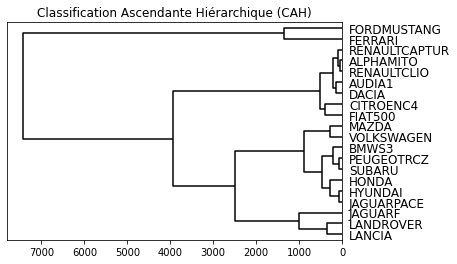

In [62]:
# On selectionne les données numériques uniquement
cars_numeric = cars.select_dtypes(include=[np.number])

# Générer de la matrice des liens
mat = linkage(cars_numeric, method='ward', metric='euclidean')

# On affiche le dendrogramme
plt.title("Classification Ascendante Hiérarchique (CAH)")
dendrogram(mat, labels=cars_numeric.index, orientation='left', distance_sort='descending',
           color_threshold=0, above_threshold_color='black')
plt.show()

# INTERPRETATION DU DENDOGRAMME

Via ce dendogramme, on retrouve d'abord en haut les voitures FORDMUSTANG ET FERRARI qui selon les interprétations précédentes semblent appartenir à la classe des voitures de sport de luxe. Elles se démarquent par une cylindrée, une puissance et une vitesse très élevées. Elles émettent une grande quatité de CO2. Elles conviennent pour des voyages de long trajet.

On distingue un autre groupe de véhicules allant de RENAULTCAPTUR à FIAT500, une variété de voitures dites citadines ou économiques, caractérisées par leurs faibles émissions de CO2, leurs cylindrées, puissances et vitesses peu fortes. Elles sont adaptées pour des déplacements à courte distance.

Le troisième groupe comptant les voitures MAZDA à JAGUARPACE est quant à lui composé de berlines/SUV moyennes, appropriées pour des voyages à court ou long trajet. Elles ont une vitesse abordable. Elles sont puissantes et possèdent de fortes cylindrées.

Le quatrième et dernier groupe est composé de trois voitures : JAGUARF, LANDROVER et LANCIA. Ces véhicules sont des berlines/SUV de haute gamme. Elles possèdent également les caractétistiques des berlines et SUV moyennes mais en meilleures. En effet, ces trois voitures sont beaucoup plus rapides que les moyennes et disposent aussi d'une puissance et d'une vitesse maximale supérieure pouvant avoisiner quelques voitures de luxe. Par exemple, la JAGUARF a une vitesse maximale supérieure à celle de la FORDMUSTANG qui est elle une voiture de sport de luxe. Ce type de véhicules est tout aussi adapté aux trajets longs et courts.

En gros, on remarque que le cluster des berlines/SUV dans l'exercice 1 s'est en quelque sorte subdivisé en deux pour marquer la distinction entre les moyennes et les haut de gamme. Il existe également deux voitures qui sont passées de voitures économiques à berlines/SUV "moyennes".

En résumé, on aurait donc envie de couper ce dendogramme en 4 classes différentes : 
- les voitures économiques
- les berlines/SUV moyennes
- les berlines/SUV haut de gamme
- les voitures de sport de luxe

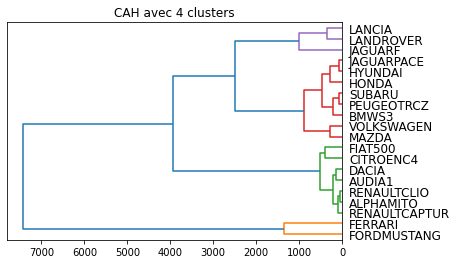

In [63]:
# On sélectionne des données numériques uniquement
cars_numeric = cars.select_dtypes(include=[np.number])

# Génération de la matrice des liens
mat = linkage(cars_numeric, method='ward', metric='euclidean')

# Formation des clusters
groupes_cah = fcluster(mat, t=1500, criterion='distance')

# Affichage du dendrogramme avec les noms des voitures
plt.title('CAH avec 4 clusters')
dendrogram(mat, labels=cars_numeric.index, orientation='left', color_threshold=1500)
plt.show()